<div style="
    border-radius: 80px;
    border: 5px solid #00FFFF;
    padding: 15px;
    background-color: #E0FFFF;
    font-size: 120%;
    text-align: center;
    font-family: 'Arial', sans-serif;
    color: #E75480; /* Koyu pembe neon */
    box-shadow: 0 0 10px #00FFFF;
">

# Anime Recommendations Systems
    


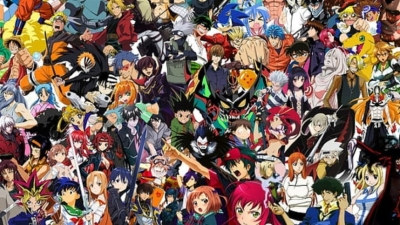

<div style="border-radius: 5px; border: 2px solid #00FF00; padding: 15px; background-color:#E0FFFF; font-size: 100%; text-align: left; font-family: 'Arial', sans-serif; color: black; box-shadow: 0 0 10px #00FF00;">

    
anime_id - anime kimliği
    
name - anime adı
    
genre - tür listesi
    
type - türü movie, TV, OVA, etc.
    
episodes - şovda kaç bölüm var
    
rating - anime için ortalama puan
    
members - topluluk sayısı


user_id - kullanıcı kimliği
    
anime_id -  bu kullanıcının derecelendirdiği anime.
    
rating - Bu kullanıcının atadığı 10 üzerinden derecelendirme 

Kütüphane

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.width', 300)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Veri Okuma

In [2]:
anime = pd.read_csv("/kaggle/input/anime-recommelo/anime.csv")
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
rating = pd.read_csv("/kaggle/input/anime-recommelo/rating.csv")
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
df = anime.merge(rating, how="left", on="anime_id")
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99.0,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152.0,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244.0,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271.0,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278.0,-1.0


In [5]:
#kullanıcı sayısı
df["user_id"].nunique()

73515

In [6]:
#anime sayısı
df["anime_id"].nunique()

12294

In [7]:
def check_df(dataframe, head=5):
    print("-------------------------- Shape ------------------------")
    print(dataframe.shape)
    print("------------------------- Types -------------------------")
    print(dataframe.dtypes)
    print("-------------------------- NA----------------------------")
    print(dataframe.isnull().sum())
    print("------------------------ describe -----------------------")
    print(dataframe.describe().T)

check_df(df)

-------------------------- Shape ------------------------
(7814824, 9)
------------------------- Types -------------------------
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating_x    float64
members       int64
user_id     float64
rating_y    float64
dtype: object
-------------------------- NA----------------------------
anime_id       0
name           0
genre        140
type          28
episodes       0
rating_x     233
members        0
user_id     1097
rating_y    1097
dtype: int64
------------------------ describe -----------------------
              count           mean            std   min       25%        50%        75%        max
anime_id  7814824.0    8912.178770    8887.387395  1.00   1241.00    6213.00   14123.00    34527.0
rating_x  7814591.0       7.652937       0.673372  1.67      7.27       7.68       8.13       10.0
members   7814824.0  178596.391721  188174.732832  5.00  44030.00  110470.00  244268.00  1013917.0

In [8]:
df["type"].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [9]:
df.groupby("type").agg({"rating_y": "sum"})

,rating_y
type,
Movie,6461896.0
Music,136726.0
ONA,501553.0
OVA,4343515.0
Special,3009141.0
TV,33554956.0


In [10]:
result = df.groupby("name")["rating_y"].sum().reset_index()
result = result.sort_values(by='rating_y', ascending=False)
result

,name,rating_y
2016,Death Note,297260.0
9721,Shingeki no Kyojin,216380.0
1709,Code Geass: Hangyaku no Lelouch,211800.0
10435,Sword Art Online,209896.0
427,Angel Beats!,197856.0
...,...,...
7337,Nagasaki 1945: Angelus no Kane,-4.0
1186,Bouken Shounen Shadar,-4.0
10219,Spheres,-4.0
3887,Hello Kitty no Alps no Shoujo Heidi,-5.0


In [11]:
#toplam kullanılan oy
comment_counts = pd.DataFrame(df["name"].value_counts())
comment_counts.head()

,count
name,
Death Note,39340
Sword Art Online,30583
Shingeki no Kyojin,29584
Code Geass: Hangyaku no Lelouch,27718
Elfen Lied,27506


In [12]:
#10000den az yorum alanları çıkar
rare_movies = comment_counts[comment_counts["count"] <= 20000].index
common_movies = df[~(df["name"].isin(rare_movies))]
common_movies.shape

(436890, 9)

In [13]:
#pivot table 
user_movie_df = common_movies.pivot_table(index=["user_id"], columns=["name"], values="rating_y")
user_movie_df.head()

name,Angel Beats!,Another,Ao no Exorcist,Clannad,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,Death Note,Elfen Lied,Fullmetal Alchemist,Fullmetal Alchemist: Brotherhood,Highschool of the Dead,Mirai Nikki (TV),Naruto,Sen to Chihiro no Kamikakushi,Shingeki no Kyojin,Sword Art Online,Toradora!
user_id,,,,,,,,,,,,,,,,,
1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,10.0,NaN,-1.0,NaN,-1.0,10.0,-1.0
3.0,NaN,8.0,8.0,NaN,NaN,NaN,10.0,NaN,NaN,10.0,6.0,NaN,8.0,10.0,10.0,9.0,NaN
4.0,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,-1.0,NaN,NaN,-1.0,-1.0,NaN
5.0,3.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,6.0,8.0,NaN,1.0,3.0
6.0,-1.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN


In [14]:
#random_user
random_user = 8000


random_user_df = user_movie_df.loc[user_movie_df.index == random_user]
random_user_df.head()
random_user_df

name,Angel Beats!,Another,Ao no Exorcist,Clannad,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,Death Note,Elfen Lied,Fullmetal Alchemist,Fullmetal Alchemist: Brotherhood,Highschool of the Dead,Mirai Nikki (TV),Naruto,Sen to Chihiro no Kamikakushi,Shingeki no Kyojin,Sword Art Online,Toradora!
user_id,,,,,,,,,,,,,,,,,
8000.0,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,7.0


In [15]:
#oy kullandıkları
movies_watched = random_user_df.columns[random_user_df.notna().any()].to_list()
movies_watched


['Code Geass: Hangyaku no Lelouch',
 'Code Geass: Hangyaku no Lelouch R2',
 'Fullmetal Alchemist',
 'Sen to Chihiro no Kamikakushi',
 'Toradora!']

In [16]:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.head()
movies_watched_df.shape  



(66126, 5)

In [17]:
#kullanıcıların seçilen kullanıcı ile ortak izlediği film sayısı
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["user_id", "movie_count"]
user_movie_count.head()


,user_id,movie_count
0,1.0,1
1,3.0,1
2,4.0,1
3,5.0,2
4,6.0,0


In [18]:
perc = len(movies_watched) * 80 / 100
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["user_id"]
# users_same_movies = user_movie_count.loc[user_movie_count["movie_count"] > perc, "userId"]
len(users_same_movies)


3758

In [19]:
final_df = movies_watched_df[movies_watched_df.index.isin(users_same_movies)]
final_df.head()
final_df.shape


(3758, 5)

In [20]:
corr_df = final_df.T.corr().unstack().sort_values()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df[corr_df["user_id_1"] == random_user]


,user_id_1,user_id_2,corr
64538,8000.0,63121.0,-0.994874
64539,8000.0,7020.0,-0.994874
64541,8000.0,11069.0,-0.994874
64543,8000.0,45028.0,-0.994874
64545,8000.0,61619.0,-0.994874
...,...,...,...
11333023,8000.0,73160.0,NaN
11333024,8000.0,73242.0,NaN
11333025,8000.0,73296.0,NaN
11333026,8000.0,73387.0,NaN


In [21]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.65)][["user_id_2", "corr"]].reset_index(drop=True)
top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "user_id"}, inplace=True)
top_users.shape
top_users.head()

,user_id,corr
546,8000.0,1.000000
545,41363.0,0.998663
535,64443.0,0.994874
528,45820.0,0.994874
529,71491.0,0.994874


In [22]:
top_users_ratings = top_users.merge(rating[["user_id", "anime_id", "rating"]], how='inner')
top_users_ratings = top_users_ratings[top_users_ratings["user_id"] != random_user]
top_users_ratings["user_id"].unique()
top_users_ratings.head()


,user_id,corr,anime_id,rating
215,41363.0,0.998663,1,10
216,41363.0,0.998663,5,10
217,41363.0,0.998663,18,-1
218,41363.0,0.998663,30,-1
219,41363.0,0.998663,43,-1


In [23]:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head()


,user_id,corr,anime_id,rating,weighted_rating
215,41363.0,0.998663,1,10,9.986631
216,41363.0,0.998663,5,10,9.986631
217,41363.0,0.998663,18,-1,-0.998663
218,41363.0,0.998663,30,-1,-0.998663
219,41363.0,0.998663,43,-1,-0.998663


In [24]:
recommendation_df = top_users_ratings.groupby('anime_id').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,anime_id,weighted_rating
0,1,6.489209
1,5,6.255996
2,6,6.295562
3,7,5.671528
4,8,4.291642


In [25]:
recommendation_df.loc[recommendation_df["weighted_rating"] > 4]
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 4].sort_values("weighted_rating", ascending=False)
movies_to_be_recommend

,anime_id,weighted_rating
2141,2555,9.702426
2281,2753,9.702426
1877,2223,9.702426
2613,3345,9.702426
2319,2805,9.702426
...,...,...
1078,1231,4.005645
1990,2372,4.005604
5388,16678,4.003886
6342,29876,4.003417


In [26]:
movies_to_be_recommend.merge(anime[["anime_id", "name"]], on="anime_id")["name"][:5]

0           Shoukoushi Cedie
1    Ushiro no Shoumen Daare
2      Maple Town Monogatari
3               Mikan Enikki
4          Onegai! Samia Don
Name: name, dtype: object

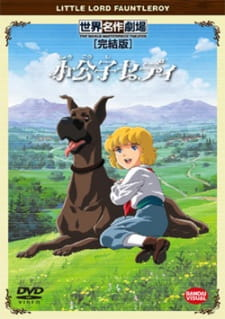